(Defining latex commands: not to be shown...)
$$
\newcommand{\norm}[1]{\left \| #1 \right \|}
\DeclareMathOperator{\minimize}{minimize}
\newcommand{\real}{\mathbb{R}}
$$

#  Monster vs. Mouse (50 Points)

While trying to sleep, you hear some noise under your bed. Being a big Science Fiction fan you obviously immediately think it's a monster. A BIG monster... or maybe two?!? Frightened to death, you do not dare to move, but your brain is racing. And it recalls that the other day, you saw a mouse disappearing on the other side of the bedroom... So maybe it is (just?!?) a mouse. Or, just something else... Hmmm. Remembering your Emperical Inference classes, you decide to evaluate the probability that, given some noise under your bed, there is a monster.

You define the random variables:

 + n = some noise under your bed (Values 0 or 1)
 + M = 0, 1 or 2 monsters under your bed (Values 0, 1 or 2)
 + m = a mouse under your bed (Values 0 or 1)
 + e = something else (e.g. only air) under your bed (Values 0 or 1),

and express your beliefs about monsters, mice and noise, by assigning numbers to P(M), P(m), P(e), P(n|M), P(n|m), P(n|e). Given that you heard some noise under your bed, you then calculate the Maximum a Posteriori (MAP) of M (i.e., the maximum of P(M|n=1)).

Please share your beliefs and your results with us.

# Programming a Hand-Featured SVM  (50 points)

The goal of this exercise is to implement a very simple SVM using an off-the-shelf optimizer, in the case of a 2-dimensional input space.
Most of it has already been implented in an iPython Notebook that you can find on the homepage of the course, and that we reproduce hereafter.

You are asked to hand out a print out of the lines marked "### CHANGE THIS LINE ###", as well as your plots.

## The SVM equation in the linear separable case

Let $(x_1,t_1), \ldots, (x_N,t_N) \in \real^p \times \{-1,1\}$ be N data points with their binary labels. For this exercise, $p=2$.  
In the lecture, we saw that trying to maximize the margin between two linearly separable classes of data points led to the problem:
\begin{equation}
    \minimize_{\substack{ \{ w \ \in \real^2,\ b \ \in \ \real \} }} \frac{1}{2} \norm{w}^2 \quad \mathrm{subject \ to} \quad t_n(w^T x_n + b) \geq 1 \quad n = 1 \ldots N ,
\end{equation}
whereby the points are subsequently classified according to the rule:
\begin{equation}
    t = \left \{ 
        \begin{array}{cc}
             \ \ 1 \quad \mathrm{if} \quad w^T x + b \geq 0 \\
             -1 \quad \mathrm{if} \quad w^T x + b < 0
        \end{array}
        \right . .
\end{equation}
The function $\mathop{l}(w,b) :=  \frac{1}{2} \norm{w}^2$ is called the _objective_ function. The equations $t_n(w^T x_n + b) \geq 1$ are called the (_inequality_) _constraints_.

In practice, one often preferres to transform this problem into its so-called _dual_ formulation. However, in this exercise, we will stick to the above equations: the _primal_ formulation.

##Loading the required packages.

In [18]:
%matplotlib inline
import numpy as np
from numpy import *
from scipy import optimize
from matplotlib import pyplot as plt

## Definition of the data point  

_X = location of the data points_ $\in \real^{N \times 2}$  
_t = label class of each point_ $\in \real^N$

In [19]:
X_ = np.array([[1.,3.],[2.,6.],[2.,3.],[-1.,0],
             [1.,0.],[2.,2.],[3.,1.],[0.,-1.]])
t_ = np.array([1,1,1,1,-1,-1,-1,-1])

## Definition of the Objective Function and its Gradient

_wb = $(w_1, w_2, b) = (w , b)$_ $\in \real^2 \times \real$

(Note that the gradient of the objective function (here called 'jac') does not appear in the equations of an SVM. But our off-the-shelf optimizer uses it for its computations.)

In [20]:
def objective(wb):
    ### changed ###
    return 1/2*(wb[0]*wb[0]+wb[1]*wb[1])

def jac(wb):
    return hstack((wb[0:2],array([0])))

## Definition of the Inequality Constraints and of their Gradient

(Again, the gradient does not appear in the SVM equations, but it is needed for our optimizer.)

In [21]:
def ineq(wb):
    #writing "return a-b" would encode the constraint a-b >= 0
    ### changed ###
    return t_*(dot(wb[0:2],X_.T)+wb[2])-1

def grad(wb):
    return -1*hstack(((-t*X.T).T, -t[:,newaxis]))

## Optimisation of the SVM

In [22]:
def optimizeSVM(X_,t_):
    global X,t
    X = X_
    t = t_
    wb0 = np.random.randn(3) #initialization
    #wb0 = array([-1.,-2.,0.2])

    cons = {'type':'ineq', #constraints
            'fun': ineq,
            'jac': grad}

    opt = {'disp':False}

    opt_result = optimize.minimize(objective, wb0, jac=jac,constraints=cons, #the optimizer
                                     method='SLSQP', options=opt)
    wb_opt = opt_result["x"] #result of the optimization
    
    return wb_opt

wb_opt = optimizeSVM(X_,t_) #the optimized parameters

## Plotting the Result

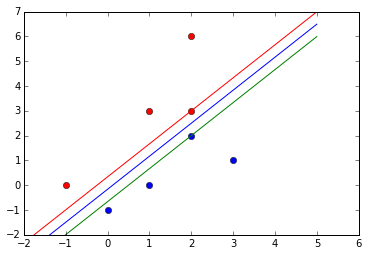

In [23]:
def plotSVM(X,t,wb):
    plt.plot(X[t>0,0],X[t>0,1], 'ro')
    plt.plot(X[t<0,0],X[t<0,1], 'bo')
    plt.axis([-2, 6, -2, 7])
    x = np.arange(-2,6,1)
    y0 = -1*wb[0]/wb[1]*x-wb[2]/wb[1]
    y1 = -1*wb[0]/wb[1]*x-(wb[2]+1)/wb[1]
    y_1 = -1*wb[0]/wb[1]*x-(wb[2]-1)/wb[1]
    plt.plot(x,y0)
    plt.plot(x,y1)
    plt.plot(x,y_1)
    
plotSVM(X_,t_,wb_opt)  ### PROVIDE THIS PLOT ###

## New Data Set

You are now given the following new data set.

In [24]:
# Generating the data
N_half = 20
u1 = random.rand(N_half)
x1 = cos(2*pi*u1) + .3*random.rand(N_half)
y1 = sin(2*pi*u1) + .3*random.rand(N_half)
u2 = random.rand(N_half)
x2 = 2.*cos(2*pi*u2) + .3*random.rand(N_half)
y2 = 2.*sin(2*pi*u2) + .3*random.rand(N_half)

# New Data
X_c = transpose(vstack((hstack((x1,x2)),hstack((y1,y2)))))
t_c = hstack((ones(N_half),-ones(N_half)))

Remark that the data is distributed on two circles, centered on zero, with different radii.

[-3, 3, -3, 3]

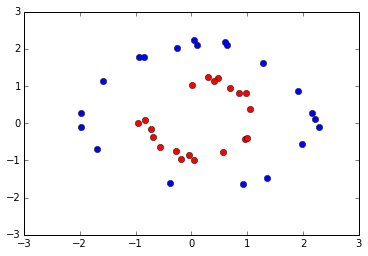

In [25]:
# Plot new data
plt.plot(X_c[t_c>0,0],X_c[t_c>0,1], 'ro')
plt.plot(X_c[t_c<0,0],X_c[t_c<0,1], 'bo')
plt.axis([-3, 3, -3, 3])

[-1, 6, -1, 6]

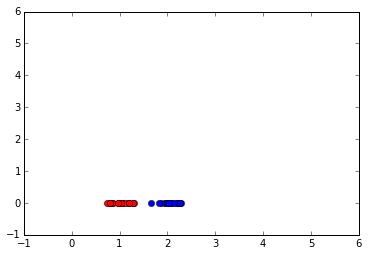

In [45]:
#X_transformed = 2.5*transpose(vstack((hstack((np.abs(x1),np.abs(x2))),hstack((np.abs(y1),np.abs(y2)))))) ### CHANGE THIS LINE ####
X_transformed = transpose(vstack((hstack((sqrt(x1**2+y1**2),sqrt(x2**2+y2**2))),np.zeros(2*N_half))))
### prbly other transormation
plt.plot(X_transformed[t_c>0,0],X_transformed[t_c>0,1], 'ro')
plt.plot(X_transformed[t_c<0,0],X_transformed[t_c<0,1], 'bo')
plt.axis([-1, 6, -1, 6])

In [27]:
shape(X_transformed)


(40, 2)

##Plotting the result in the transformed space. 
(Lines are commented, because code does not compile, until X has been correctly transformed.)

In [46]:
wb_opt_c = optimizeSVM(X_transformed,t_c)
#plotSVM(X_transformed,t_c,wb_opt_c)  ### PROVIDE THIS PLOT ###s
#plotSVM(X_transformed,t_c,[-2,2,-1]) 

ValueError: all the input array dimensions except for the concatenation axis must match exactly

Feel free (not mandatory!) to rewrite the function plotSVM to plot the data and the separation curve, not in the transformed space (as above), but in the original space.